# Third Assignment Part 1: Line of work 1

This google colab is aimed at developing the first line of work: determining whether there is seasonality of watermelons and whether there are some remarkable consumption patterns related to watermelons.

In order to do so, we first of all work with the hypothesis from the statistical point of view, and then we will apply machine learning techniques to verify the statistical results.

The authors of the colab are:

<table>
  <thead>
    <th>Name</th>
    <th>Github</th>
    <th>E-Mail</th>
  </thead>
  <tbody>
    <tr>
      <td>Raúl Barba Rojas</td>
      <td><a href="https://github.com/RaulBarbaRojas">RaulBarbaRojas</a></td>
      <td><a href="mailto:Raul.Barba@alu.uclm.es">Raul.Barba@alu.uclm.es</a></td>
    </tr>
    <tr>
      <td>Diego Guerrero Del Pozo</td>
      <td><a href="https://github.com/DiegoGDP">DiegoGDP</a></td>
      <td><a href="mailto:Diego.Guerrero@alu.uclm.es">Diego.Guerrero@alu.uclm.es</a></td>
    </tr>
    <tr>
      <td>Maja Anna Swierk</td>
      <td><a href="https://github.com/manna8">Manna8</a></td>
      <td><a href="mailto:MajaAnna.Swierk@alu.uclm.es">MajaAnna.Swierk@alu.uclm.es</a></td>
    </tr>
    <tr>
      <td>Jakub Konieczny</td>
      <td><a href="https://github.com/KubaKonieczny">KubaKonieczny</a></td>
      <td><a href="mailto:Jakub.Konieczny@alu.uclm.es">Jakub.Konieczny@alu.uclm.es</a></td>
    </tr>
  </tbody>
</table>

# 1. Statistical analysis of hypothesis 1: watermelons experience seasonality (2018-2019)

## 1.1. Introduction

Firstly, we will try to analyse whether the hypothesis is met or not using statistics. In order to do so, we will use both confidence intervals and p-values.

## 1.2. Loading the data

The first step to either confirm or reject the hypothesis setted is to load the data card 1, which is the data that we have to use in order to develop our first line of work (to load the data, the file `datacard_h1_not_normalized.txt`, in the content folder of the google colab):

In [ ]:
import pandas as pd

datacard_h1 = pd.read_csv('/content/datacard_h1_not_normalized.txt', index_col = 0)

## 1.3. Studying the hypothesis 1

Our first hypothesis was to state that watermelons suffer from the phenomena of seasonality, and that they were sold in some seasons more than in the others. But of course, we have to prove it using inferential statistics, using both the confidence intervals and the p-value, and also with the help of association rules in BigML.

In this hypothesis, we are saying that watermelons suffer from seasonality, so first, we need to set the null and the alternative hypothesis:

- Null hypothesis (Ho): watermelons do not suffer from seasonality.
- Alternative hypothesis (Ha): watermelons suffer from seasonality.

At this point, our aim is to not discard Ho until we demonstrate that Ha is not plausible under Ho.

### 1.3.1. Confidence interval

Before developing the confidence intervals, we needed to transform a bit the datacard 1, because the idea is to calculate the mean of the expense per capita in watermelons through the different months so we finish with a dataset with 24 rows, 2 per each month during 2018 and 2019, grouped by CCAA.

In [ ]:
from copy import deepcopy

datacard_h1_CI = deepcopy(datacard_h1)
datacard_h1_CI.drop(columns=['PRECIO MEDIO kg ó litros'], inplace=True)
datacard_h1_CI

,month,GASTO X CAPITA
90,1,0.00
141,1,0.00
192,1,0.00
243,1,0.03
294,1,0.00
...,...,...
21765,12,0.02
21816,12,0.00
21918,12,0.00
21969,12,0.01


Now, we can construct the confidence interval to see if all values lies within it.

In [ ]:
import numpy as np

monthly_spend_per_capita_h1 = datacard_h1_CI['GASTO X CAPITA']

print("Confidence interval: ",[monthly_spend_per_capita_h1.mean() - monthly_spend_per_capita_h1.std()*1.96/ np.sqrt(len(monthly_spend_per_capita_h1)), 
                        monthly_spend_per_capita_h1.mean() + monthly_spend_per_capita_h1.std()*1.96/ np.sqrt(len(monthly_spend_per_capita_h1))])

Confidence interval:  [0.45155754101540024, 0.5648956609550431]


If there was no seasonality, most of these values would lie within this confidence interval, so lets plot all of them:

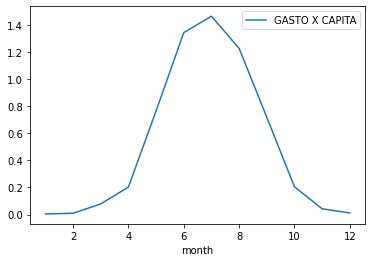

In [ ]:
datacard_h1_CI = datacard_h1_CI.drop(columns=['year'],errors='ignore')
datacard_h1_CI_grouped = datacard_h1_CI.groupby(['month']).mean()
datacard_h1_CI_grouped.plot(kind = 'line')

As we can see, only a few values are found in the confidence interval. Values corresponding to winter, or autumn months are found below the CI, while the ones corresponding to summer months are above the CI. This makes us reject the null hypothesis while accepting the alternative one, showing a clear seasonality.

### 1.3.2. P-Value

To reassure our previous result, we will now use the p-value to try to confirm the alternative hypothesis. One way to check it is to compare the expense per capita values previously obtained versus the expected optimal ones, which would be a sequence of 406 values of the middle point of the confidence interval.

In [ ]:
from scipy import stats

expected_monthly_spend_per_capita = [0.5082] * 406

stats.ttest_ind(monthly_spend_per_capita_h1, expected_monthly_spend_per_capita, equal_var = False)

Ttest_indResult(statistic=0.0009200422781285433, pvalue=0.9992663655749122)

As we can see, the p-value is very high, compared to the necessary one to not reject the null hypothesis, which would be a maximum of 0.05 (for a 95% of confidence). Thus, we accept the alternative hypothesis as true.

### 1.3.3. Conclusions

To conclude, we can say that using statistical tools just as confidence intervals or p-values we already verified that the initial hypothesis (seasonality of watermelons) is true (both gave the same result, using 95% as confidence value, so we can assure that there is seasonality of watermelons).

However, we will also try to study seasonality, as well as consumption patterns, with other techniques, such as association rules and clustering.

# 2. Studying consumption patterns of watermelons

Another objective that we had within this first line of work is to study whether there are consumption patterns related to the consumption of watermelons in Spain.

In order to do so, we proposed two different ways of determining whether there are or not consumption patterns: association rules and clustering.

One thing to note is that clustering must be analised in order to really say that the clusters are related to consumption patterns (clusters are black boxes, there is no way to group them in the way we want, but if we study that the groups are related to consumption patterns, then we can obtain them those consumption patterns).

## 2.1. Association rules

In order to extract the association rules, we decided to use BigML, as it offers a visible way of understanding the association rules, and they can also be customized to only obtain association rules for a specific consequent (in this case, the expense per capita, which is the feature that can give us information about the consumption patterns).  

Thus, with the help of BigML, we discovered a series of association rules which helped us detect different patterns in the data. They can be seen in the following chart:

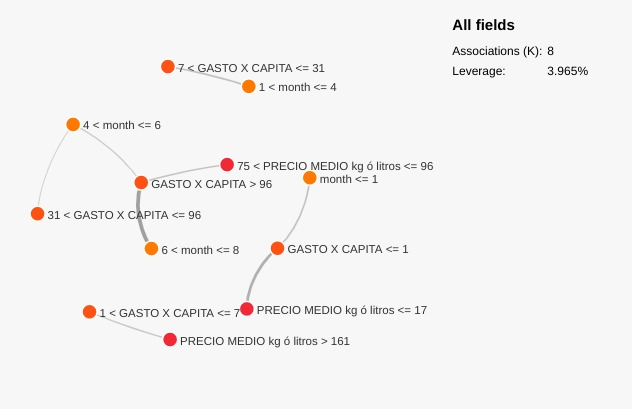

Above, we can see the association rules obtained which have the spend per capita as the consequent. At the top, we can see how from February to April, the found values are between 7 and 31; and at the right we observe a rule determining how in January the spend is below 1, almost negligible.

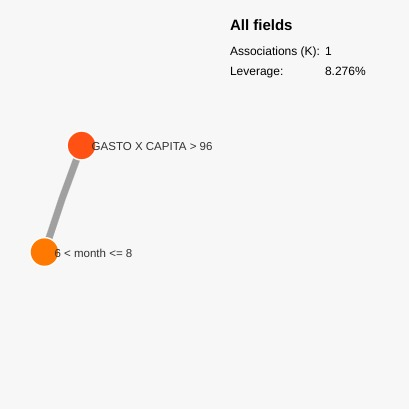

That one is the rule with the highest leverage value, which states that during July and August, the spend goes above 96, a clearly higher value than the ones explained before, which also reaffirms our idea that during summer the watermelon consumption increases.

From all this information, we can also infer that between September and January, the value will only decrease, until reaching the low values previously stated in January.

Thus, with association rules we already confirm that there are consumption patterns associated to the watermelons, such as the fact that they are more consumed in summer and less consumed in other seasons of the year.

## 2.2. Clustering

The main objective of this section is to apply clustering techniques in order to determine whether there are consumption patterns related to the consumption of watermelons in Spain (2018-2019, before covid-19).

Obviously, the result of the application of the clustering algorithms might have little or nothing to do with these consumption patterns that we are studying, as a result, there will be an important work of cluster interpretation, to see whether the clusters provide us the information that we want or not.

Additionally, we decided to apply clustering using both BigML and Sklearn. The reason why we decided to use BigML is because it provides a simple and fast way of obtaining clusters associated to our data.

However, we also decided to apply clustering using sklearn, because it allows us to obtain a more fine-grained tuning of the clustering algorithms to obtain better results.

### 2.2.1. BigML clustering

When applying BigML, the first decision was to decide the number of clusters that we were going to give to the KMeans algorithm that it uses.

Our decision here was to set 3 clusters, because the idea was to divide the year into phases of 4 months, where there could be big changes (seasonality). Thus, we used KMeans in BigML as the clustering algorith, selecting those 3 clusters. The results can be seen in the image below:

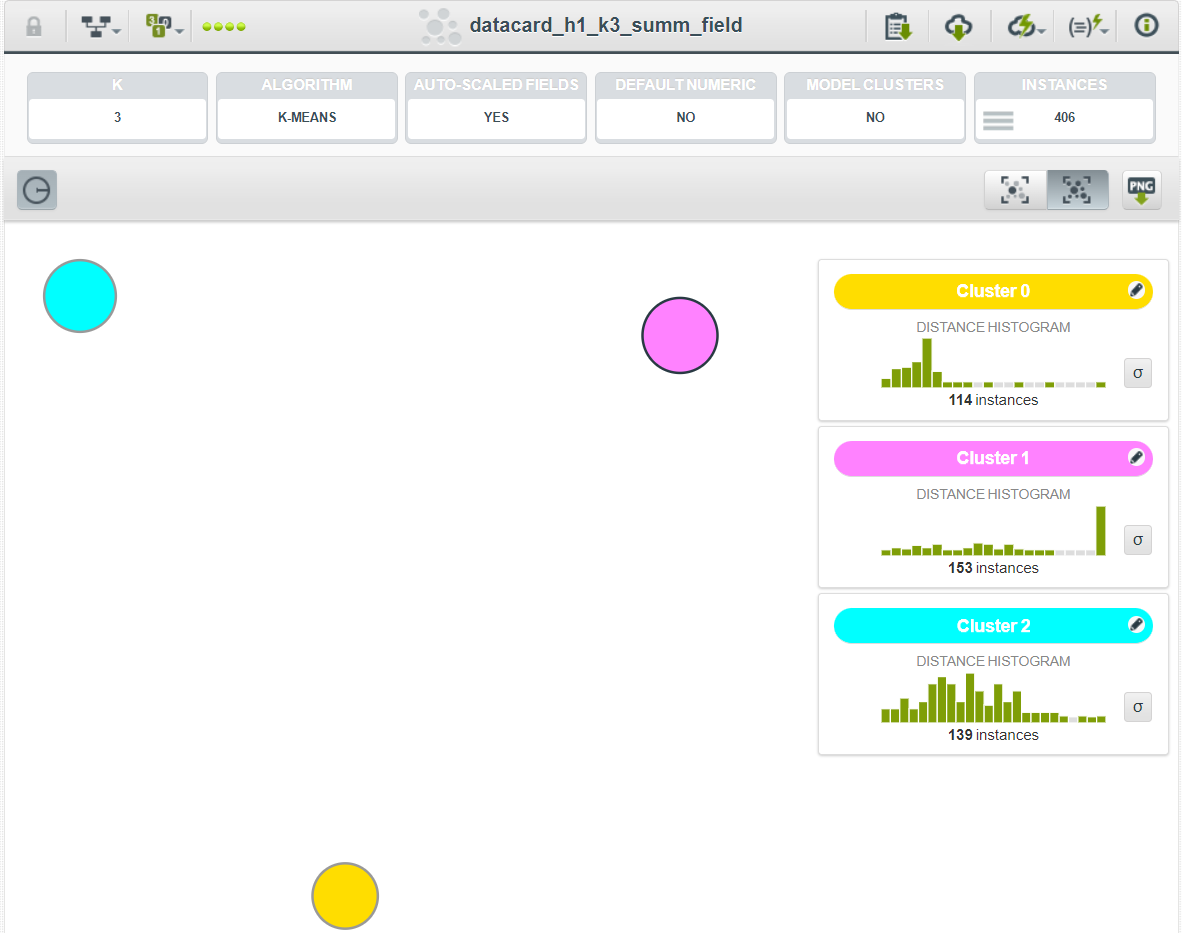

Now let us describe each of the clusters individually (one subsection per cluster, to fully understand each cluster).

#### 2.2.1.1. Cluster 0

The first thing we decided to do was to plot the expense per capita together with the month, to obtain information related to the expense per capita (per month) for this first cluster:

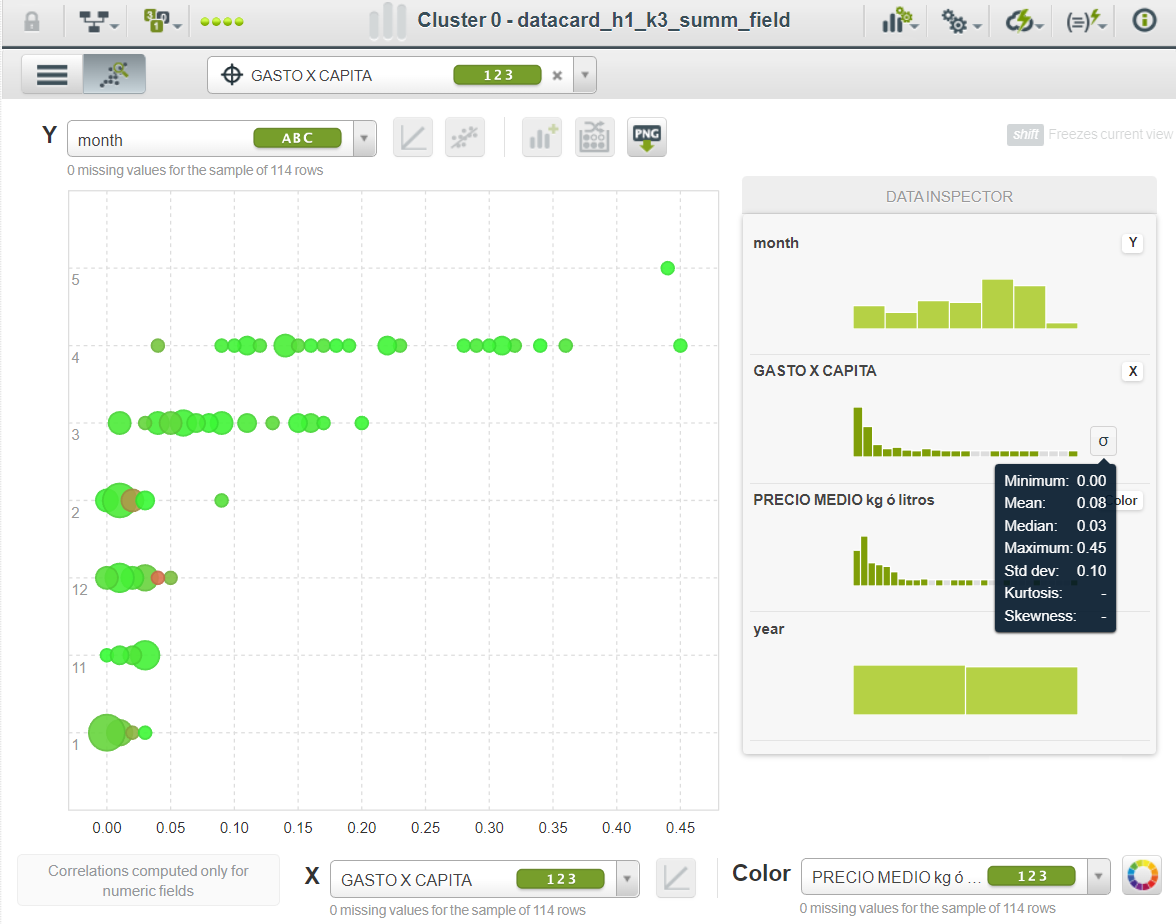

As we can see, it presents watermelons consumption for different months (there are some months whose expense per capita on average is 0). That can be due to the fact that some months lead to no consumption (or almost no consumption) of watermelons.

Let us also take a look to the average price per kg of the watermelons per month:

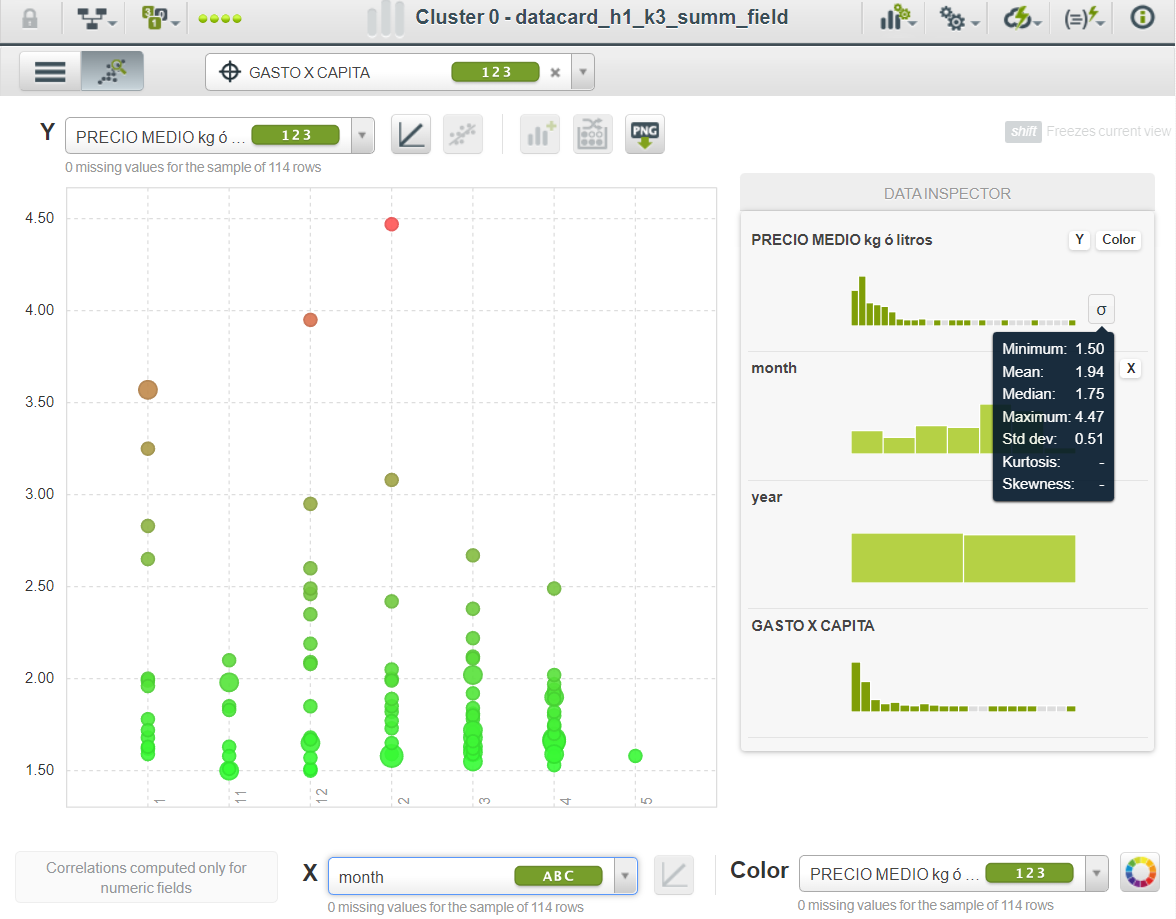

Above we can see prices per kg. Mean price for watermelons during winter and early spring amounts to 1.94. This scatter plot indicates that the highest prices of watermelon are in coldest months, so in December, January and February, in which the maximum price - 4.47 was noted. 

That could indicate that the watermelons do have seasonality (proving it again).

#### 2.2.1.2. Cluster 1

For the cluster 1, we decided to study the same relationships among variables, to extract information again. Let us show the chart of gasto x capita and month:

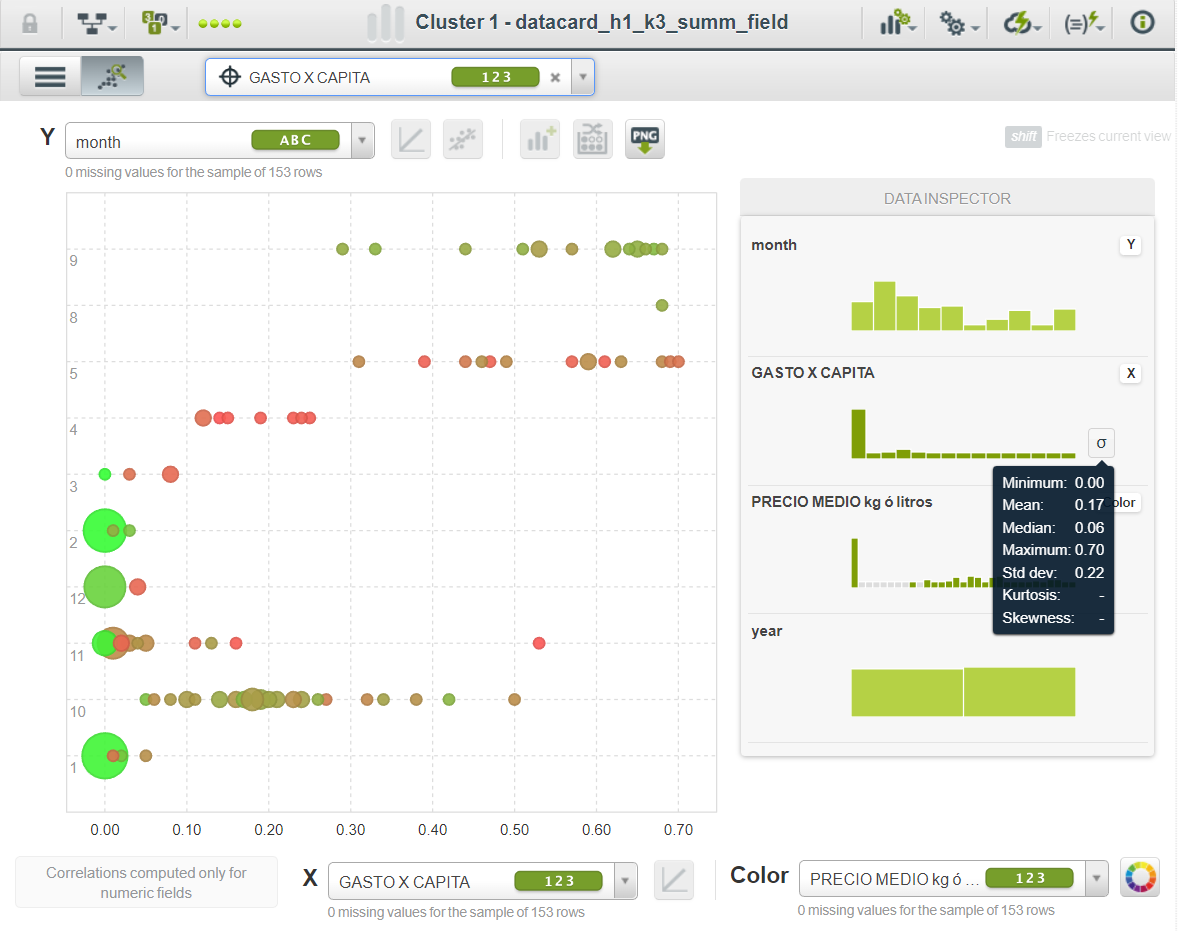

This cluster is much more extensive that the previous one. It gathers consumption from almost all months except June and July. Interestingly, it has only one instance which month is equal to 8 (August). Mean value of consumption is a bit bigger and amounts to 0.17. As we can see, winter months has lower value of consumption, than the rest of the months what, again, is connected to seasonality of watermelons.

Thus, the cluster could represent months that are not in summer (a bit higher expense per capita).

Below we can see the 'month' versus 'PRECIO MEDIO kg ó litros' scatter plot.

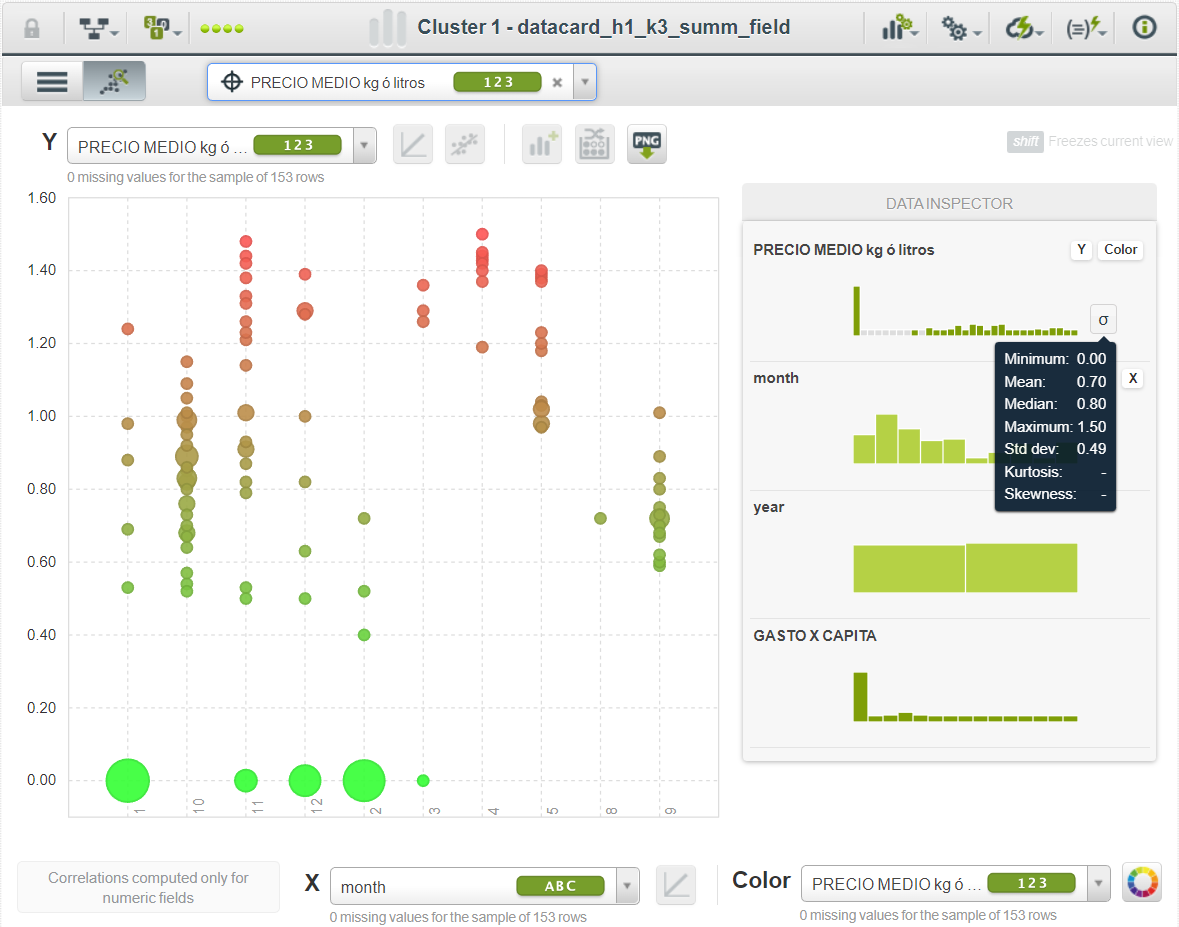

As we can see the lowest prices are in August and September - the high season for watermelons. The mean price accounts to 0.7, which is much lower that mean price from the previous cluster.

#### 2.2.1.3. Cluster 2

Again, for the cluster 2 we will follow the same procedure. Firstly, let us show the chart of the expense per capita and the months:

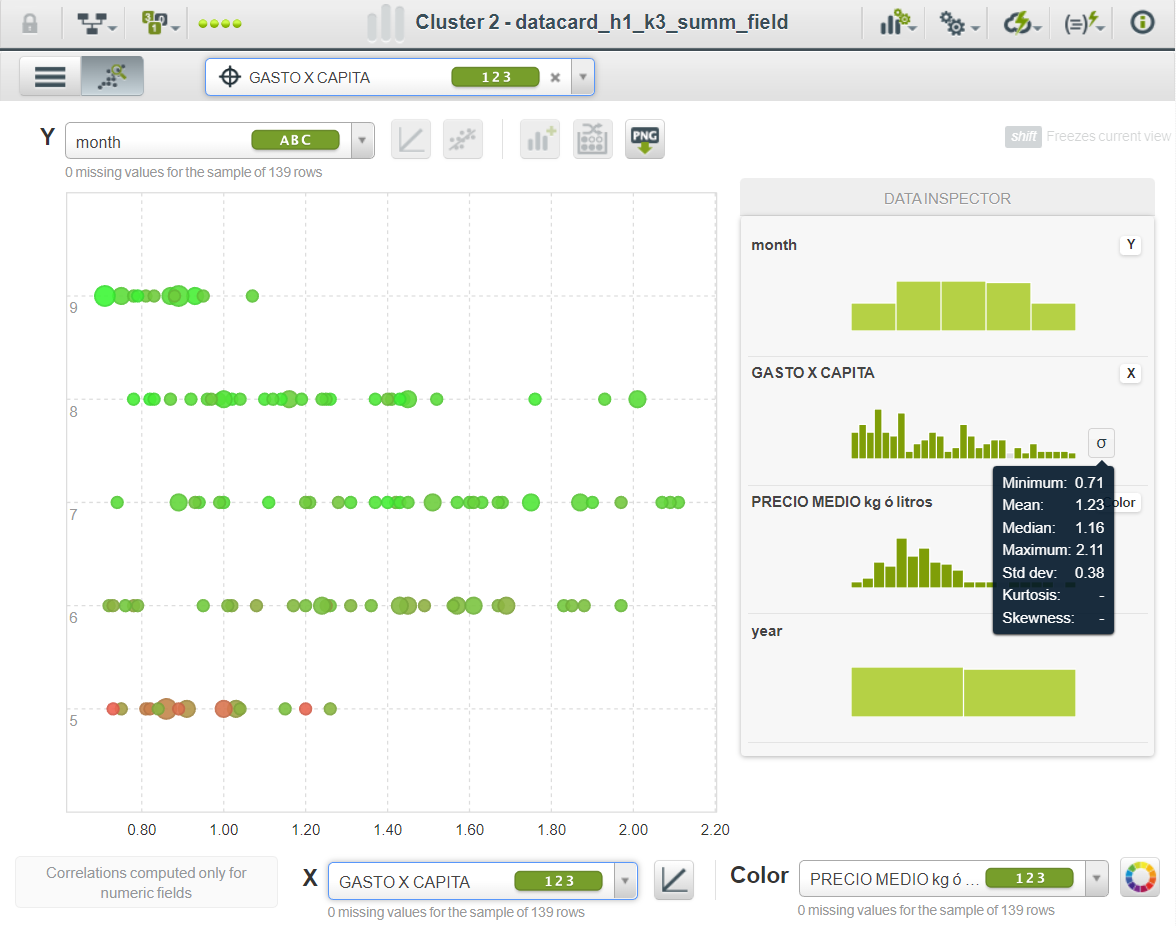

This cluster, unlike the others, is connected to warmer months - from 5 to 9, so from May to September. We can observe that the highest consumption occurs in July - here is the maximum value of consumption column - 2.11. The mean consumption is also significantly higher in comparison to other clusters - it amounts to 1.23. It is clear, that this cluster is connected to growing season for watermelon.

Let us take a look at watermelon prices during the high season.

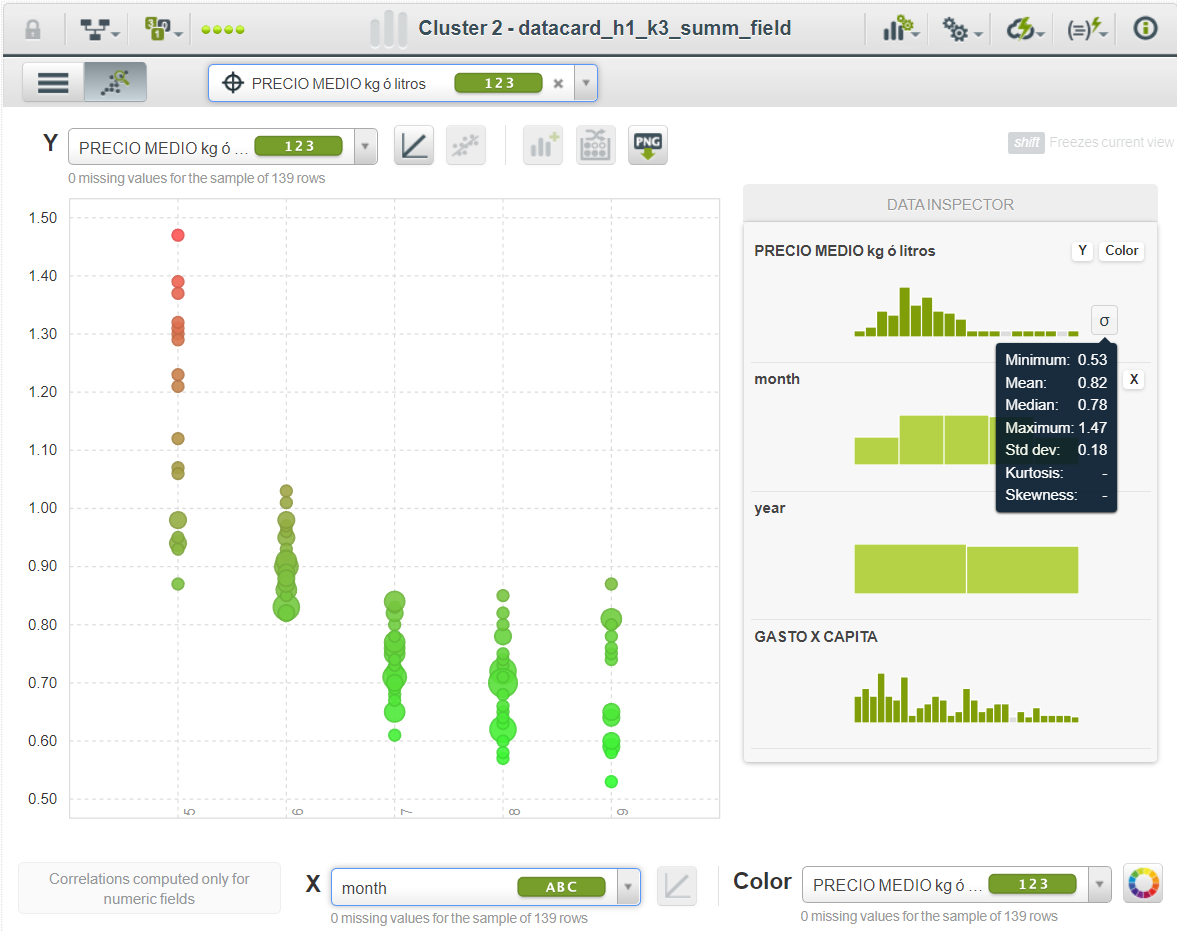

Although the mean price is higher than from the previous cluster, prices are not that different, during the summer they remain in the same price range - between 0.5 and 0.9 per kg. The highest prices are in May.

#### 2.2.1.4. BigML clustering Conclusions

Seasonality of watermelon has an impact on its consumption - it is much higher during the late spring and early summer, so in months, in which watermelons grow. What is more, during the summer, the prices per kg of the watermelon are the lowest.

Thus, there are multiple conclusions derived from this initial clustering:

- There is seasonality of watermelons (different months,groups of months in fact, lead to different expenses per capita).

- There is a group where the expense per capita is lower (high season, in summer) and other 2 groups with higher expense per capita (because the watermelons are more expensive, due to the fact that it is low season).

### 2.2.2. Sklearn

To adapt clustering to our needs, we decided to use Sklearn, so that we can apply different algorithms with different parameters to obtain better results, which will help to obtain a more interesting interpretation of results.

#### 2.2.2.1. Normalization

The first step before applying any algorithm is to normalize the data, because clustering algorithms are distance-based algorithms, thus it is important to normalize the data to avoid weird results. There are multiple scalers but we will use the StandardScaler, as it gave better results when compared to the others:

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
data_card_norm = scaler.fit_transform(datacard_h1)

In [ ]:
data_card_norm

array([[-1.59694897, -0.87345381, -0.5858067 ],
       [-1.59694897, -0.87345381, -0.30552928],
       [-1.59694897, -0.87345381, -1.60365628],
       ...,
       [ 1.59837993, -0.87345381, -1.60365628],
       [ 1.59837993, -0.8562675 ,  0.62381165],
       [ 1.59837993, -0.80470858,  0.2992799 ]])

#### 2.2.2.2. PCA

The next step that we need to perform is to apply PCA. The main purpose of PCA is the data visualization rather than dimensionality reduction, because in this case we do not have a huge amount of data.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.8)
X_pca = pca.fit_transform(data_card_norm)
X_pca.shape

(406, 3)

As we can see, to get at least 80% of explained variance we need 3 components, however, for the data visualization we will only use 2 (the charts are easier to interpret):

In [ ]:
pca_viz = PCA(n_components=2)
X_pca_viz = pca_viz.fit_transform(data_card_norm)
X_pca_viz.shape

(406, 2)

#### 2.2.2.3. Data Vizualization

As the expense per capita is related with our hypothesis, we decided ||||||| for validation of our clustering algorithms we will mostly focus on a graph that represents the relation between Gasto x Capita and month (the last one). 

In [ ]:
import plotly.express as px
fig = px.scatter(x = X_pca_viz[:,0], y = X_pca_viz[:,1])
fig.show()

The data visualization looks just fine, however, it lacks a third component that we are not seeing, and also, we do not have any information of the domain (principal components do not have a meaning, they are only a mathematical artifact).

Thus, we will also create a chart for month and expense per person, and we will use it to see how the clustering works (to interpret its "correctness", based on our needs):

In [ ]:
import plotly.express as px
fig = px.scatter(datacard_h1, x = 'month', y = 'GASTO X CAPITA')
fig.show()

#### 2.2.2.4. Choosing clustering algorithm

There are multiple algorithms that can be used to apply clustering, such as KMeans, DBSCAN, HAC...

Although the reader of this document will see it with his own eyes, after developing DBSCAN we decided to omit its results as they are worse compared to the other two algorithms.

Thus, we will use KMeans and Agglomerative Clustering for the interpretation, because looking at the charts in the Graphs section we can see that data is distributed quite equally and it also makes sense from the point of view of the domain knowledge.

For both KMeans and Agglomerative Clustering, we decided to set the n_clusters parameter for 3, because that number of clusters was proved most appropriate in the BigML application (and also the domain knowledge tells us that this is a good approach). 

##### 2.2.2.4.1. KMeans

Firstly, in order to apply KMeans, we needed to determine its most important parameter: the number of clusters. In this case, as it was mentioned before, we obtained that a number of clusters 3 is not only good for the results of the algorithm (proven by BigML), but also good in terms of the domain knowledge (we need a number of clusters that can be interpreted with a significant meaning). Thus we will use k=3:

In [ ]:
from sklearn.cluster import KMeans

km  = KMeans(3)

km.fit(data_card_norm)

KMeans(n_clusters=3)

In [ ]:
import plotly.express as px
fig = px.scatter(datacard_h1, x = 'month', y = 'GASTO X CAPITA', color=km.labels_)

fig.show()

After applying the algorithm, we can clearly see how there is a first cluster related to the first months of the year (low expense per person), another cluster related to a higher expense per person (related to the highest expense per person) and then a last cluster (with low expense per person).

As a result, we can conclude that KMeans works really good for our purpose, as it allowed us to obtain information about 2 aspects:

1. There is a clear seasonality in the consumption of watermelons in Spain (before covid-19).

2. There are clear consumption patterns related to the watermelons, in this case, people tend to have a higher expense per capita during summer (high season), while having a smaller expense per capita in the rest of the year (low season).

##### 2.2.2.4.2. DBSCAN


As mentioned above, we also tried to use DBSCAN for solving the problem, however, it did not proof to work correctly as it can be seen below (the parameters were obtained after multiple trials using the elbow method, considering eps = 2 as having 2 points in time (months) where the consumption is the same should mean that they belong to a high density area).

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 2, min_samples=8)

dbscan.fit(data_card_norm)

DBSCAN(eps=2, min_samples=8)

Let us visualize the data:

In [ ]:
import plotly.express as px
fig = px.scatter(x = datacard_h1['month'], y = datacard_h1['GASTO X CAPITA'], color=dbscan.labels_)
fig.show()

As we can see, we obtain 2 clusters and some outliers by making use of DBSCAN. 

The interpretation we can obtain is the following one: maybe, DBSCAN gives a good clustering, however, according to the domain knowledge point of view, this clustering algorithm is not really giving us useful information for the purpose of studing consumption patterns of watermelons and/or seasonality.

Thus, we need to explore other options (KMeans, HAC...).

##### 2.2.2.4.3. Agglomerative Clustering


Another algorithm that we decided to use is Agglomerative clustering. This algorithm should work fine, considering that the amount of data we have is not too much, thus we are avoiding its main disadvantage. Again, we are using a number of clusters of 3, because we it is what fits better for the problem according to what we are expecting (but also it is supposed to be good, as BigML gave good results with it). Let us see the results:

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
ac = AgglomerativeClustering(n_clusters=3)

ac.fit(data_card_norm)

AgglomerativeClustering(n_clusters=3)

Let's visualize the data:

In [ ]:
import plotly.express as px
fig = px.scatter(x = datacard_h1['month'], y = datacard_h1['GASTO X CAPITA'], color=ac.labels_)
fig.show()

As we can see, again we obtain the same conclusions that we obtained using KMeans:

1. There is a clear seasonality in the consumption of watermelons in Spain (before covid-19).

2. There are clear consumption patterns related to the watermelons, in this case, people tend to have a higher expense per capita during summer (high season), while having a smaller expense per capita in the rest of the year (low season).

Now, let us obtain general conclusions from the sklearn clustering.

#### 2.2.3. Sklearn clustering conclusion



After applying clustering with sklearn, we can conclude the following aspects:

1. We tried multiple algorithms with the best parameters that we could (applying elbow rule for instance), to test the multiple algorithms in their best shape.

2. DBSCAN did not work as we expected, and its results were not useful for our purposes. It is a clear example that shows how clustering can give you the results that you do not expect. That does not mean that it is not correct, it simply means that it is not useful for our purpose.

3. KMeans anad Agglomerative Clustering gave us the expected results, as we obtained 3 clusters more or less grouped in groups of 4 months (consecutive) each, which is what we were expecting for our hypothesis.

4. There is a clear seasonality of watermelons, which gives us another way of validating our initial hypothesis.

5. There are consumption patterns related to the watermelons. These consumption patterns are related to the seasonality: people tend to consume more in summer and less in the other seasons of the year.



# 3. Line of work 1 conclusions



To conclude, we will sum up what we did:

1. We used a statistical approach to try to validate the hypothesis that watermelons experience seasonality.

2. We tried to study the consumption patterns of watermelons using rules of association.

3. We used clustering algorithms for further studying the consumption patterns.

The conclusions that we can obtain related to the first line of work are the following ones:

- Watermelons do experience seasonality, thus our initial hypothesis is validated. In this case, we demonstrated that the expense per person of watermelons depends on the month of the year, being summer the season where it is the highest and the other seasons the lowest values (there are clear trends, from january to summer it starts increasing, from august to december it starts decreasing).

- There exist consumption patterns associated to the watermelons, however, they are clearly related to their seasonality, this is, people tend to consume more watermelons on summer (which is why the expense per person is greater), while consuming less watermelons in other moments of the year (this is not related to the price per kg of the watermelons, which could be higher than in summer).

- Using domain knowledge after the study that we developed, we can see how the best play by a producer could be to sell almost all watermelons in high season (selling more with less price) while keeping a small amount of watermelons for low season (selling less with more price).